# The Anscombe's Quartet Database

The purpose of this Jupyter notebook is to anaylse Anscombe's quartet database. There are four tasks to be carried out in this notebook:

1. Explain the background to the dataset – who created it, when it was created, and any speculation you can ﬁnd regarding how it might have been created.
2. Plot the interesting aspects of the database
3. Calculate the descriptive statistics of the variables in the dataset. 
4. Explain why the dataset is interesting, referring to the plots and statistics above.

## Background

The proverb “A picture is worth 1000 words” is one you have probably heard more than once. A picture can also be worth 1000 data points. [[Natalia]( http://natalia.dbsdataprojects.com/2016/02/29/anscombes-quartet/)]

The Anscombe's Quartet Database was created by Francis John Anscombe. These were the subjects of a 1973 paper in “The American Statistician”. He wrote a paper about the importance of actually graphing your data, and not just depending on statistical analysis. 

He created four sets of XY data pairs, each with identical average X, average Y, variance in X and Y, mean X and Y, linear regression slope and intercept, and even correlation coefficients and RMSE values. In other words, these data sets seemed to be about the same—until they are graphed. [[Vernier](https://www.vernier.com/innovate/anscombes-quartet/)]

Graphs may not be as precise as statistics, but they provides a unique view onto data that can make it much easier to discover interesting structures than numerical methods. Graphs also provides the context necessary to make better choices and to be more careful when fitting models. Anscombe’s Quartet is a case in point, showing that four datasets that have identical statistical properties can indeed be very different [[Rstudio](https://rstudio-pubs-static.s3.amazonaws.com/52381_36ec82827e4b476fb968d9143aec7c4f.html)]

<img src="https://upload.wikimedia.org/wikipedia/en/d/d5/Francis_Anscombe.jpeg">

## Plotting the Database

In [108]:
# Import the necessary libraires for this notebook
import pandas as pd # Data Manipulation
import numpy as np # Summary Statistics
import seaborn as sns # Plots
import matplotlib.pyplot as plt # Plots
from scipy import stats # Linear Regression

In [109]:
# load the example dataset for Anscombe's quartet
df = pd.read_csv('anscombe.csv')
df

,x1,y1,x2,y2,x3,y3,x4,y4
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


In [118]:
# Print the mean of X and Y
print(np.round(df.mean(), decimals=3))

x1    9.000
y1    7.501
x2    9.000
y2    7.501
x3    9.000
y3    7.500
x4    9.000
y4    7.501
dtype: float64


In [119]:
# Print the standard deviation of X and Y
print(np.round(df.std(), decimals=3))

x1    3.317
y1    2.032
x2    3.317
y2    2.032
x3    3.317
y3    2.030
x4    3.317
y4    2.031
dtype: float64


In [121]:
# Print the variance of X and Y
print(np.round(df.var(), decimals=3))

x1    11.000
y1     4.127
x2    11.000
y2     4.128
x3    11.000
y3     4.123
x4    11.000
y4     4.123
dtype: float64


In [122]:
print(np.round(df.corr(), decimals=3))

       x1     y1     x2     y2     x3     y3     x4     y4
x1  1.000  0.816  1.000  0.816  1.000  0.816 -0.500 -0.314
y1  0.816  1.000  0.816  0.750  0.816  0.469 -0.529 -0.489
x2  1.000  0.816  1.000  0.816  1.000  0.816 -0.500 -0.314
y2  0.816  0.750  0.816  1.000  0.816  0.588 -0.718 -0.478
x3  1.000  0.816  1.000  0.816  1.000  0.816 -0.500 -0.314
y3  0.816  0.469  0.816  0.588  0.816  1.000 -0.345 -0.155
x4 -0.500 -0.529 -0.500 -0.718 -0.500 -0.345  1.000  0.817
y4 -0.314 -0.489 -0.314 -0.478 -0.314 -0.155  0.817  1.000


In [123]:
anscombe = sns.load_dataset("anscombe")
anscombe.groupby("dataset").describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

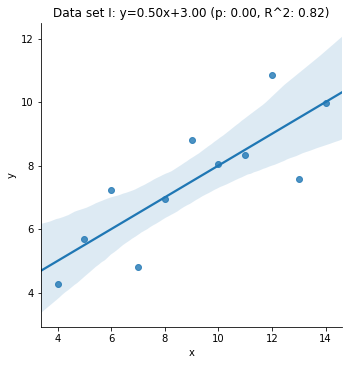

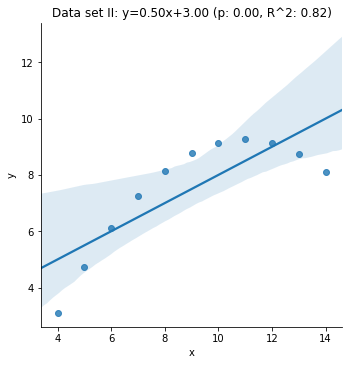

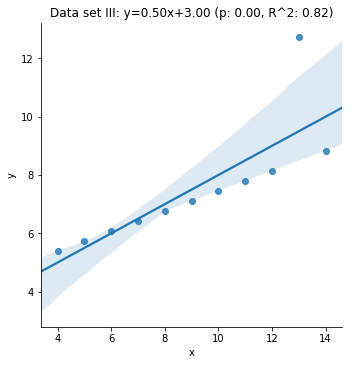

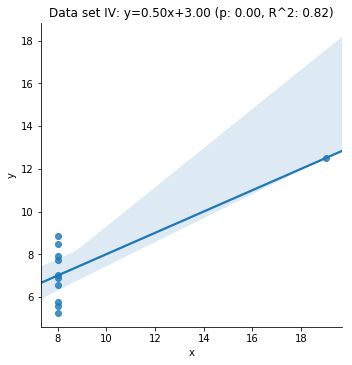

In [124]:
# Show the results of a linear regression within each dataset
data = sns.load_dataset("anscombe")
for data_set in anscombe.dataset.unique():
     df = data.query("dataset == '{}'".format(data_set))
     slope, intercept, r_val, p_val, slope_std_error = stats.linregress(x=df.x, y=df.y)
     sns.lmplot(x="x", y="y", data=df);
     plt.title("Data set {}: y={:.2f}x+{:.2f} (p: {:.2f}, R^2: {:.2f})".format(data_set, slope, intercept, p_val, r_val))
     plt.show()


Anscombe's quartet comprises four datasets that have nearly identical simple descriptive statistics, yet appear very different when graphed.Each dataset consists of eleven (x,y) points (wiki)

## Linear Regression

Dataset 1 is the picture drawn by the mind's eye when a simple linear regression equation is reported. Yet, the same summary statistics apply to dataset 2, which shows a perfect curvilinear relation, and to dataset 3, which shows a perfect linear relation except for a single outlier.

The summary statistics also apply to datset 4, which is the most troublesome. Datasets 2 and 3 clearly call the straight line relation into question. Dataset 4 does not. A straight line may be appropriate in the fourth case. However, the regression equation is determined entirely by the single observation at x=19. Paraphrasing Anscombe, we need to know the relation between y and x and the special contribution of the observation at x=19 to that relation. (jerry)

Anscombe who helped computerize statistical analyses while seeking to avoid flawed interpretations of such data. In using computers to analyze statistical data, he drew on his expertise in the sampling of inspections for industrial quality control, the philosophical foundations of probability and the analysis of variance. (NY Times)



1. https://www.vernier.com/innovate/anscombes-quartet/

2.http://www.jerrydallal.com/lhsp/anscombe/

3. https://rstudio-pubs-static.s3.amazonaws.com/52381_36ec82827e4b476fb968d9143aec7c4f.html

4. http://natalia.dbsdataprojects.com/2016/02/29/anscombes-quartet/

5. https://vknight.org/unpeudemath/mathematics/2016/10/29/anscombes-quartet-variability-and-ciw.html